# *Examen Parcial 1: Procesamiento Digital De Imagenes*
### **Estudiante:** Edward Fabian Goyeneche Velandia - 1007540013  / Andrea Yuliana Rivadeneira

### **Profesores:** Diego Armando Perez Rosero - Lucas Miguel Iturriago Salas


---



## **Imagenes a usar:**

In [1]:
# libreiria de imagenes

from PIL import Image
from IPython.display import display

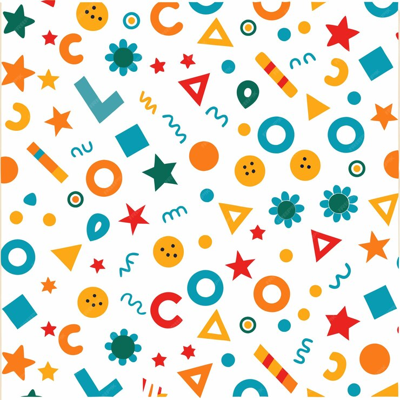

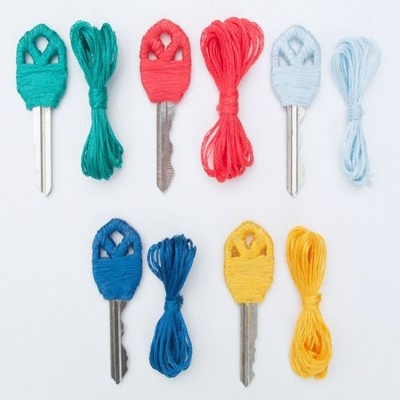

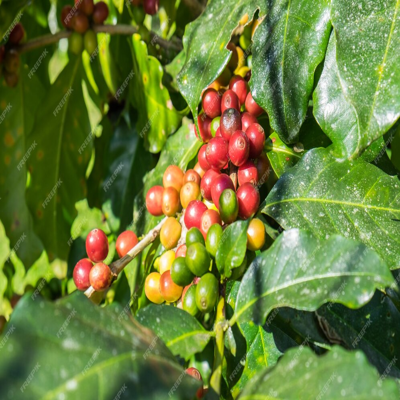

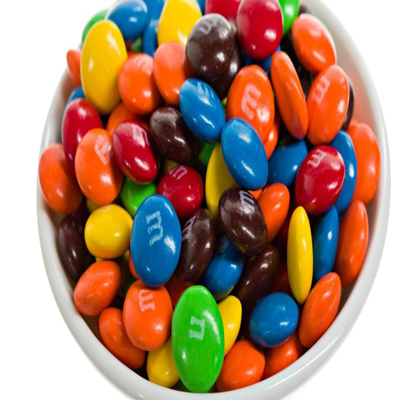

In [2]:
imagen0 = Image.open('image_exam/Imagen.jpg').resize((400, 400))
imagen1 = Image.open('image_exam/Llaves.jpg').resize((400, 400))
imagen2 = Image.open('image_exam/cafe.jpg').resize((400, 400))
imagen3 = Image.open('image_exam/m&m.jpeg').resize((400, 400))

display(imagen0)
display(imagen1)
display(imagen2)
display(imagen3)


# **EJERCICIO 1**
Construir una función debidamente documentada, que reciba un parámetro llamado "color", con el cual se indique los colores de caramelos que se quieren mostrar en la siguiente imagen:4


Los posibles valores que puede tomar el parámetro "color" son:

* Amarillo.
* Verde.
* Azul.
* Purpura.
* Rosado.
* Rojo.
* Naranja.
* Negro
* Café

Todas sus posibles combinaciones. Ej: Rojo y Amarillo, Rojo, Amarillo y Purpura Tal como se ve en las imágenes de abajo(**son solo de referencia y no hacen parte del taller**)

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Diccionario de colores HSV ajustados
# Se definen los rangos de colores en el espacio de color HSV (matiz, saturación, valor).
# Los valores de los colores están representados por dos tuplas: el rango inferior y superior para cada color.
colores_hsv = {
    "amarillo": [(15, 50, 50), (35, 255, 255)],     # Amarillo claro a fuerte
     "verde": [(35, 60, 50), (90, 255, 180)],        # Verde más cálido, menos azuloso
    "azul": [(100, 30, 50), (130, 255, 255)],      # Azul ajustado para evitar el rango verde
    "purpura": [(130, 40, 50), (170, 255, 255)],    # Púrpura claro a fuerte
    "rosado": [(160, 50, 50), (180, 255, 255)],     # Rosado claro a fuerte
    "rojo": [(0, 50, 50), (10, 255, 255)],          # Rojo claro a fuerte
    "naranja": [(5, 100, 100), (15, 255, 255)],     # Naranja claro a fuerte
    "negro": [(0, 0, 0), (180, 255, 40)],           # Negros y sombras
    "cafe": [(10, 20, 20), (30, 150, 150)],         # Café claro a oscuro
}

# Función para segmentar colores específicos de una imagen
def segmentar_colores(imagen_path, colores, aplicar_morfologia=True):
    """
    Segmenta los colores seleccionados en una imagen dada utilizando el espacio de color HSV.

    Parámetros:
    - imagen_path (str): Ruta del archivo de la imagen a procesar.
    - colores (list): Lista de nombres de los colores a segmentar (debe coincidir con las claves del diccionario colores_hsv).
    - aplicar_morfologia (bool): Si es True, se aplican operaciones morfológicas (cierre y apertura) para mejorar la segmentación.

    Retorna:
    - resultado (ndarray): Imagen con los colores segmentados, mostrada en formato RGB.
    """

    # Cargar la imagen en formato BGR (por defecto en OpenCV)
    imagen = cv2.imread(imagen_path)

    # Convertir la imagen de BGR a RGB
    imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

    # Convertir la imagen de RGB a HSV
    imagen_hsv = cv2.cvtColor(imagen_rgb, cv2.COLOR_RGB2HSV)

    # Inicializar la máscara total (una matriz de ceros con el mismo tamaño que la imagen)
    mascara_total = np.zeros(imagen_rgb.shape[:2], dtype=np.uint8)

    # Iterar sobre la lista de colores solicitados
    for color in colores:
        # Convertir el nombre del color a minúsculas y eliminar espacios extra
        color = color.strip().lower()

        # Verificar si el color está en el diccionario de colores definidos
        if color in colores_hsv:
            # Obtener los límites inferior y superior de ese color en HSV
            lower = np.array(colores_hsv[color][0])
            upper = np.array(colores_hsv[color][1])

            # Crear una máscara binaria donde los píxeles dentro del rango de color son 255 y el resto 0
            mascara = cv2.inRange(imagen_hsv, lower, upper)

            # Unir la máscara actual con la máscara total usando una operación OR bit a bit
            mascara_total = cv2.bitwise_or(mascara_total, mascara)

    # Si se debe aplicar morfología para mejorar la segmentación, hacer las siguientes operaciones
    if aplicar_morfologia:
        # Definir un kernel (matriz de 5x5 con unos) para las operaciones morfológicas
        kernel = np.ones((5, 5), np.uint8)

        # Aplicar el cierre morfológico (dilatar y luego erodir) para eliminar pequeñas zonas oscuras
        mascara_total = cv2.morphologyEx(mascara_total, cv2.MORPH_CLOSE, kernel)

        # Aplicar la apertura morfológica (erosionar y luego dilatar) para eliminar pequeñas zonas brillantes
        mascara_total = cv2.morphologyEx(mascara_total, cv2.MORPH_OPEN, kernel)

    # Aplicar la máscara a la imagen original para obtener solo las áreas de interés
    resultado = cv2.bitwise_and(imagen_rgb, imagen_rgb, mask=mascara_total)

    # Retornar la imagen resultante con los colores segmentados
    return resultado


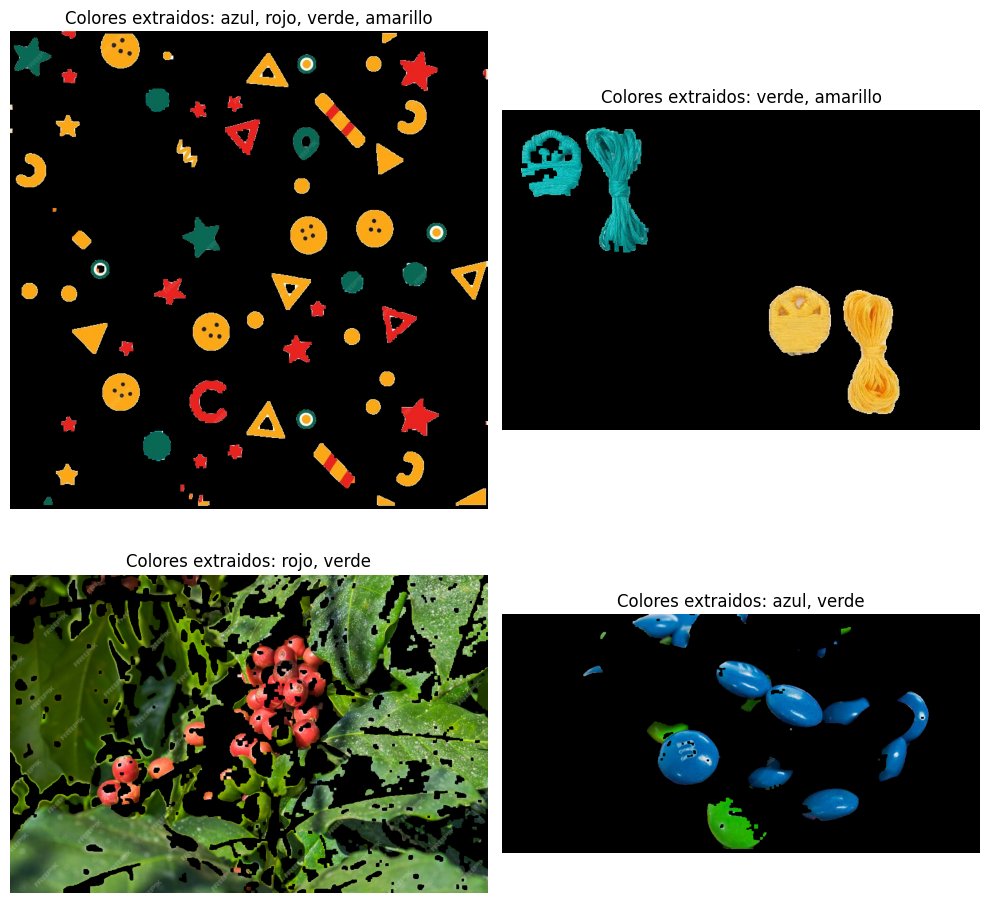

In [33]:
# Subplot para mostrar todas las imágenes
# Crear el subplot (2 filas, 2 columnas)
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()  # Aplanar para indexar más fácil

# Lista de imágenes y colores
imagenes = [
    ("image_exam/Imagen.jpg", ["azul", "rojo", "verde", "amarillo"]),
    ("image_exam/Llaves.jpg", ["verde", "amarillo"]),
    ("image_exam/cafe.jpg", ["rojo", "verde"]),
    ("image_exam/m&m.jpeg", ["azul", "verde"]),
]

# Procesar y mostrar cada imagen
for i, (imagen_path, colores) in enumerate(imagenes):
    resultado = segmentar_colores(imagen_path, colores)
    axs[i].imshow(resultado)
    axs[i].set_title(f"Colores extraidos: {', '.join(colores)}")
    axs[i].axis("off")

plt.tight_layout()
plt.show()

# **EJERCICIO 2:**
Construir una función debidamente documentada, que reciba un parámetro llamado "Operacion_Morfologica", el cual permitirá indicar a cual de los siguientes cuatro estados se quiere llevar la imagen "original". Lo anterior aplicando las cuatro operaciones morfólogicas vistas en clase a pedal, use cualquier imagen.

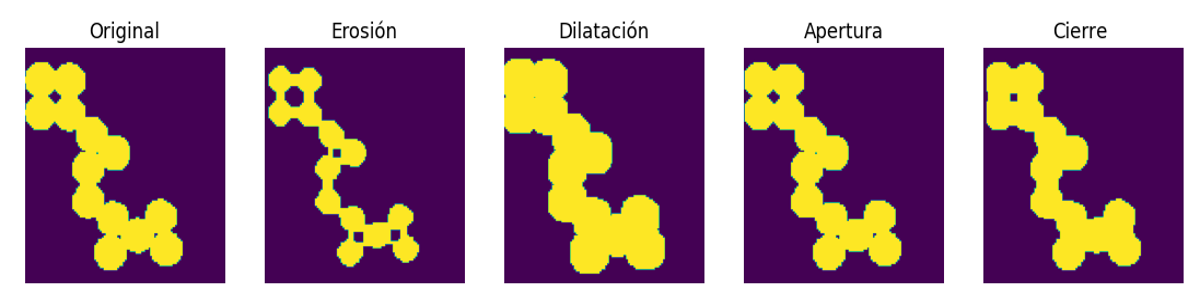

In [3]:

display(Image.open('images_zip/methods.png').resize((1200, 300)))

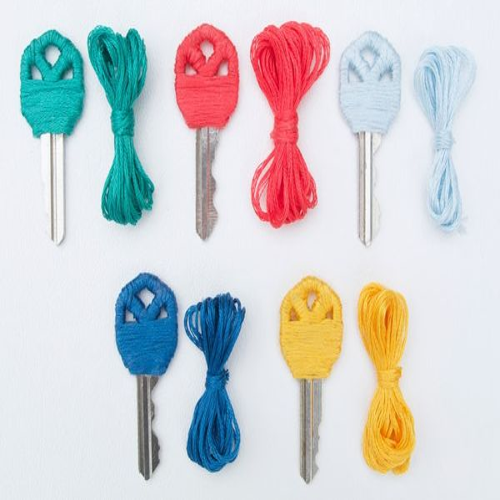

In [4]:
display(Image.open('image_exam/Llaves.jpg').resize((500, 500)))

In [5]:
import numpy as np
from skimage.morphology import rectangle
from skimage.color import rgb2gray
from skimage.io import imread
import matplotlib.pyplot as plt

In [6]:


def O_manual_erotion(image, struct_element):
    """
    Funcion en la cual se applica la operación de erosión de manera  manual a una imagen  que tiene que sere binaria.

    Parameters:
        - image: numpy.ndarray
            Entrada de la funcion  que debe de ser una iamgen binaria.
        - struct_element: numpy.ndarray
            Entrada que corresponde a el  elemento estructurante utilizado para aplicar la erosión.

    Returns:
        numpy.ndarray
           Retorna el array de la imagen resultante después de aplicar la erosión manual.
    """
    rows, columns = image.shape
    struct_rows, struct_columns = struct_element.shape
    result = image.copy()

    struct_center_row, struct_center_columns = struct_rows // 2, struct_columns // 2

    for i in range(struct_center_row, rows - struct_center_row):
        for j in range(struct_center_columns, columns - struct_center_columns):
            roi = image[i - struct_center_row: i + struct_center_row + 1,
                        j - struct_center_columns: j + struct_center_columns + 1]

            if np.all(roi * struct_element):
                result[i, j] = 1
            else:
                result[i, j] = 0

    return result



def O_manual_dilatation(image, struct_element):
    """
    Funcion en la cual se applica la operación de dilatacion de manera  manual a una imagen  que tiene que sere binaria.

    Parameters:
        - image: numpy.ndarray
            Entrada de la funcion  que debe de ser una imagen binaria.
        - struct_element: numpy.ndarray
            ntrada que corresponde a el  elemento estructurante utilizado para aplicar la dilatación.

    Returns:
        numpy.ndarray
            La imagen resultante después de aplicar la dilatación.
    """
    rows, columns = image.shape
    struct_rows, struct_columns = struct_element.shape
    result = image.copy()

    struct_center_row, struct_center_columns = struct_rows // 2, struct_columns // 2

    for i in range(struct_center_row, rows - struct_center_row):
        for j in range(struct_center_columns, columns - struct_center_columns):
            roi = image[i - struct_center_row: i + struct_center_row + 1,
                        j - struct_center_columns: j + struct_center_columns + 1]

            if np.any(roi * struct_element):
                result[i, j] = 1
            else:
                result[i, j] = 0

    return result


"""
img= imread('image_exam/Llaves.jpg')
binary_img = np.where(img <= 0.5, 0, 1)


morfological_operation = input("Ingrese la operación morfologica que desea realizar (erosion, dilatacion, apertura, cierre): ")


rows_rect = 5
cols_rect = 5

"""



'\nimg= imread(\'image_exam/Llaves.jpg\')\nbinary_img = np.where(img <= 0.5, 0, 1)\n\n\nmorfological_operation = input("Ingrese la operación morfologica que desea realizar (erosion, dilatacion, apertura, cierre): ")\n\n\nrows_rect = 5\ncols_rect = 5\n\n'

In [7]:
def  morfological_operation(image, operation,rows_rect,columns_rect):
    """
   Funcion General que a aplica la operación morfológica a una imagen binaria.

    Parameters:
        - image: numpy.ndarray
            La imagen binaria de entrada.
        - operation: str
            La operación morfológica a aplicar. Puede ser 'erosion', 'dilatacion', 'apertura' o 'cierre'.
        - rows_rect: int
            Número de filas del elemento estructurante.
        - columns_rect: int
            Número de columnas del elemento estructurante.

    Returns:
        numpy.ndarray
            La imagen resultante después de aplicar la operación morfológica.
    """
    struct_element = rectangle(rows_rect, columns_rect)
    
    if operation == 'erosion':
        return O_manual_erotion(image, struct_element)
    elif operation == 'dilatacion':
        return O_manual_dilatation(image, struct_element)
    elif operation == 'apertura':
        return O_manual_dilatation(O_manual_erotion(image, struct_element), struct_element)
    elif operation == 'cierre':
        return O_manual_erotion(O_manual_dilatation(image, struct_element), struct_element)
    else:
        return 'Operación no valida'
    


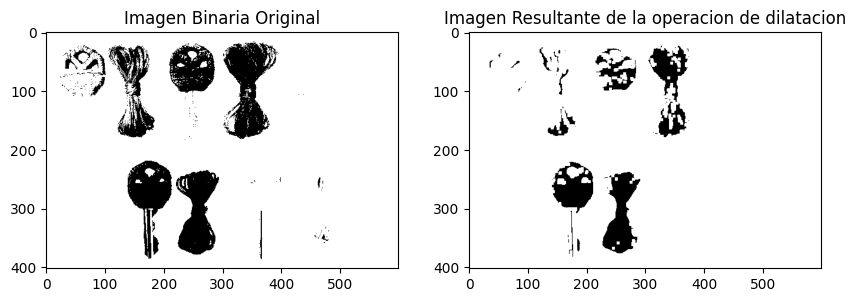

In [8]:
img= imread('image_exam/Llaves.jpg', as_gray=True)

binary_img = np.where(img <= 0.5, 0, 1)

operation = "dilatacion"
rows_rect = 5
columns_rect = 5

result_image = morfological_operation(binary_img, operation, rows_rect, columns_rect)


plt.figure(figsize=(10, 10))
plt.subplot(1,2,1)
plt.imshow(binary_img, cmap='gray')
plt.title('Imagen Binaria Original')
plt.subplot(1,2,2)
plt.imshow(result_image, cmap='gray')
plt.title('Imagen Resultante de la operacion de '+ operation)
plt.show()

In [9]:
import cv2 
import numpy as np
from skimage.io import imread
from skimage.color import rgba2rgb
import matplotlib.pyplot as plt


In [15]:
import numpy as np
from skimage.morphology import erosion, dilation, opening, closing

# Erosión
def Op_erotion(image, kernel):
    
    
    """
    Esta funcion aplica la operación de erosión a la imagen dada, donde a la iamgen se le saca el tamaño y los canales  para usarlos en el Kernel.

    Parameters:
        image (numpy.ndarray): Imagen de entrada, puede ser RGB o en escala de grises.
        kernel (numpy.ndarray): Núcleo estructurante del kernel  para la operación.

    Returns:
        numpy.ndarray: Imagen después de aplicar la erosión.
    """
    
    if len(image.shape) == 3:  # Imagen RGB
        eroded_channels = [erosion(image[:, :, i], kernel) for i in range(3)]
        return np.stack(eroded_channels, axis=-1)  # Combinar canales
    elif len(image.shape) == 2:  # Imagen escala de grises
        return erosion(image, kernel)
    else:
        raise ValueError("La imagen debe ser RGB o en escala de grises.")

# Dilatación
def Op_dilatation(image, kernel):
    
    """
    Esta funcion aplica la operación de dilatacion a la imagen dada, donde a la iamgen se le saca el tamaño y los canales  para usarlos en el Kernel.n.

    Parámetros:
        image (numpy.ndarray): Imagen de entrada, puede ser RGB o en escala de grises.
        kernel (numpy.ndarray): Núcleo estructurante para la operación.

    Retorna:
        numpy.ndarray: Imagen después de aplicar la dilatación.

    Excepciones:
        ValueError: Si la imagen no es RGB ni escala de grises.
    """
    if len(image.shape) == 3:  # Imagen RGB
        dilated_channels = [dilation(image[:, :, i], kernel) for i in range(3)]
        return np.stack(dilated_channels, axis=-1)  # Combinar canales
    elif len(image.shape) == 2:  # Imagen escala de grises
        return dilation(image, kernel)
    else:
        raise ValueError("La imagen debe ser RGB o en escala de grises.")

# Apertura
def Op_opening(image, kernel):
    
    """
    Esta funcion aplica la operación de apertura a la imagen dada, donde a la iamgen se le saca el tamaño y los canales  para usarlos en el Kernel

    Parámetros:
        image (numpy.ndarray): Imagen de entrada, puede ser RGB o en escala de grises.
        kernel (numpy.ndarray): Núcleo estructurante para la operación.

    Retorna:
        numpy.ndarray: Imagen después de aplicar la apertura.

    Excepciones:
        ValueError: Si la imagen no es RGB ni escala de grises.
    """
    
    if len(image.shape) == 3:  # Imagen RGB
        opened_channels = [opening(image[:, :, i], kernel) for i in range(3)]
        return np.stack(opened_channels, axis=-1)  # Combinar canales
    elif len(image.shape) == 2:  # Imagen escala de grises
        return opening(image, kernel)
    else:
        raise ValueError("La imagen debe ser RGB o en escala de grises.")

# Cierre
def Op_closing(image, kernel):
    
    """
    Esta funcion aplica la operación de Cierre a la imagen dada, donde a la iamgen se le saca el tamaño y los canales  para usarlos en el Kernel

    Parámetros:
        image (numpy.ndarray): Imagen de entrada, puede ser RGB o en escala de grises.
        kernel (numpy.ndarray): Núcleo estructurante para la operación.

    Retorna:
        numpy.ndarray: Imagen después de aplicar el cierre.

    Excepciones:
        ValueError: Si la imagen no es RGB ni escala de grises.
    """
    
    if len(image.shape) == 3:  # Imagen RGB
        closed_channels = [closing(image[:, :, i], kernel) for i in range(3)]
        return np.stack(closed_channels, axis=-1)  # Combinar canales
    elif len(image.shape) == 2:  # Imagen escala de grises
        return closing(image, kernel)
    else:
        raise ValueError("La imagen debe ser RGB o en escala de grises.")



In [16]:
# Función general para operaciones morfológicas
def Morphological_operation(image, operation, kernel_height, kernel_width):
    
    """
    Esta es la funcion Aplica una operación morfológica específica la imagen, las operaciones son  los resultados de la funciones de las operacions ya  previamente realizadas.

    Parameters:
        image (numpy.ndarray): Imagen de entrada, puede ser RGB o en escala de grises.
        operation (str): Operación a realizar. Opciones:
        - 'erosion': funcion 'Op_erotion'.
        - 'dilatacion': funcion 'Op_dilatation'.
        - 'apertura': funcion 'Op_opening'.
        - 'cierre': funcion 'Op_closing'.
        kernel_height (int): Altura del kernel.
        kernel_width (int): Ancho del kernel.

    Returns:
        numpy.ndarray: Imagen después de aplicar la operación seleccionada.

    """
    
    kernel = np.ones((kernel_height, kernel_width), np.uint8)
    if operation == 'erosion':
        return Op_erotion(image, kernel)
    elif operation == 'dilatacion':
        return Op_dilatation(image, kernel)
    elif operation == 'apertura':
        return Op_opening(image, kernel)
    elif operation == 'cierre':
        return Op_closing(image, kernel)
    else:
        raise ValueError(f"Operación no válida: {operation}")


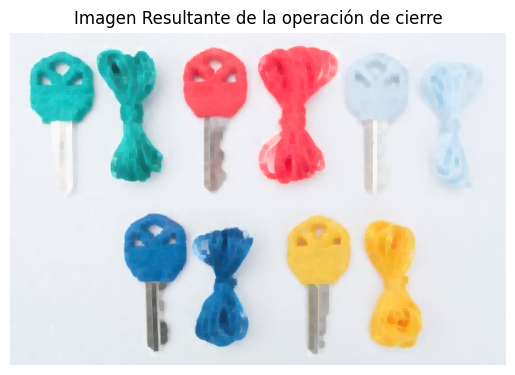

In [22]:
from skimage.io import imread
from skimage.util import img_as_ubyte

# Cargar la imagen
img = imread('image_exam/Llaves.jpg')
img = img_as_ubyte(img) 

# Parámetros
operation = 'cierre'
kernel_height, kernel_width = 5, 5

# Aplicar la operación
result_image = Morphological_operation(img, operation, kernel_height, kernel_width)

plt.imshow(result_image)
plt.title(f'Imagen Resultante de la operación de {operation}')
plt.axis('off')
plt.show()

# **Ejercicio 3:**

Crear un código que pueda separar los objetos de la imagen por tamaños, permitiendo al usario elegir el tamaño. Para los resutlados mostrar en una sola gráfica dos figuras, una con la imagen original y la otra con el elemento que se eliminó o separó.

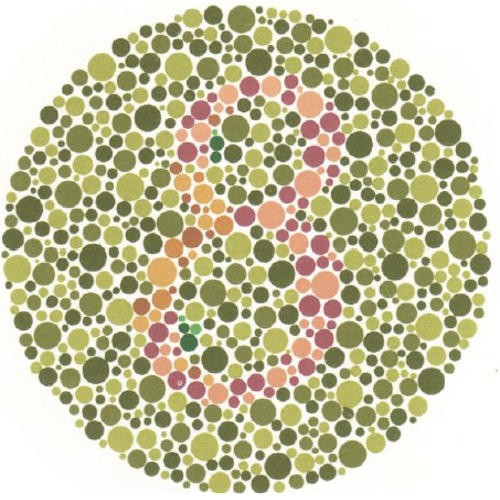

In [34]:
display(Image.open('images_zip/balls.png').resize((500, 500)))

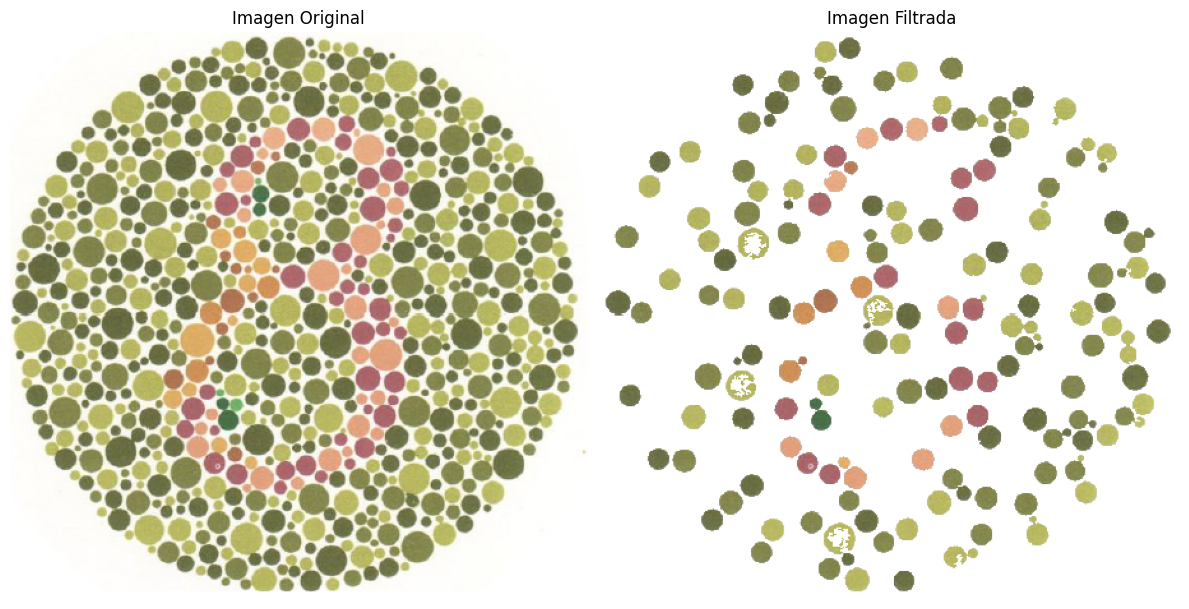

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cargar la imagen desde un archivo
imagen_path = 'images_zip/balls.png'  # Ruta del archivo de la imagen
imagen = cv2.imread(imagen_path, cv2.IMREAD_COLOR)  # Cargar la imagen en formato color

# Convertir la imagen a escala de grises para simplificar el procesamiento
imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)  # Convertir la imagen de BGR a escala de grises

# Aplicar un umbral adaptativo para segmentar los objetos de la imagen
umbral = cv2.adaptiveThreshold(imagen_gris, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
# `adaptiveThreshold` convierte la imagen en blanco y negro (binaria) para facilitar la detección de contornos

# Encontrar los contornos de los objetos en la imagen binaria
contornos, _ = cv2.findContours(umbral, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# `findContours` detecta los contornos de los objetos visibles en la imagen

# Filtrar contornos muy pequeños que no deben ser considerados (eliminar ruido)
contornos = [c for c in contornos if cv2.contourArea(c) > 10]  # Eliminar contornos con un área menor a 10

# Calcular las áreas de cada contorno para clasificar los objetos por tamaño
areas = [cv2.contourArea(c) for c in contornos]  # Calcular el área de cada contorno detectado
pequenos = []  # Lista para círculos pequeños
medianos = []  # Lista para círculos medianos
grandes = []   # Lista para círculos grandes

# Clasificar los contornos según su área (tamaño de los círculos)
for c, area in zip(contornos, areas):
    if area < 180:  # Si el área es menor que 180, clasificamos como círculo pequeño
        pequenos.append(c)  # Agregar el contorno de círculo pequeño
    elif 180 <= area <= 350:  # Si el área está entre 180 y 350, es un círculo mediano
        medianos.append(c)  # Agregar el contorno de círculo mediano
    else:  # Si el área es mayor que 350, clasificamos como círculo grande
        grandes.append(c)  # Agregar el contorno de círculo grande

# Función para mostrar la imagen filtrada por las categorías de círculos seleccionadas
def mostrar_por_categoria(categorias):
    """
    Esta función recibe una lista de categorías y muestra la imagen original junto con una imagen filtrada,
    donde se muestran solo los círculos de las categorías seleccionadas. Los círculos son dibujados con su color original.

    Args:
    categorias (list): Lista de categorías a mostrar. Las categorías deben ser 'pequeño', 'mediano' o 'grande'.
    """
    # Crear una copia de la imagen original con fondo blanco
    imagen_filtrada = np.ones_like(imagen) * 255  # Crear una imagen de fondo blanco con las mismas dimensiones que la imagen original

    # Diccionario que asocia cada categoría a un color específico
    color_map = {
        "pequeño": (255, 0, 0),  # Azul para círculos pequeños
        "mediano": (0, 255, 0),  # Verde para círculos medianos
        "grande": (0, 0, 255)    # Rojo para círculos grandes
    }

    # Dibujar los círculos de las categorías seleccionadas en la imagen filtrada
    for categoria in categorias:
        # Asignar los contornos correspondientes a la categoría seleccionada
        if categoria == "pequeño":
            contornos_a_dibujar = pequenos  # Usar los contornos de los círculos pequeños
        elif categoria == "mediano":
            contornos_a_dibujar = medianos  # Usar los contornos de los círculos medianos
        elif categoria == "grande":
            contornos_a_dibujar = grandes  # Usar los contornos de los círculos grandes
        else:
            print(f"Categoría '{categoria}' no válida.")  # Si la categoría no es válida, mostrar un mensaje
            continue  # Continuar con la siguiente categoría sin procesar la actual

        # Dibujar los círculos de la categoría seleccionada en la imagen filtrada
        for contorno in contornos_a_dibujar:
            # Crear una máscara negra para cada círculo (esto asegura que solo el círculo se mantenga visible)
            mascara = np.zeros_like(imagen_gris)  # Crear una máscara completamente negra (sin círculos)
            cv2.drawContours(mascara, [contorno], -1, 255, thickness=cv2.FILLED)  # Rellenar el círculo en la máscara

            # Obtener el color del círculo de la imagen original y colocarlo en la imagen filtrada
            for i in range(3):  # Recorrer los tres canales de color (BGR)
                imagen_filtrada[:, :, i] = np.where(mascara == 255, imagen[:, :, i], imagen_filtrada[:, :, i])
                # Usar `np.where` para copiar el color del círculo desde la imagen original a la imagen filtrada

    # Mostrar la imagen original y la imagen filtrada en dos subgráficas
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Mostrar la imagen original
    ax[0].imshow(cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB))  # Convertir de BGR a RGB para que se muestre correctamente
    ax[0].set_title("Imagen Original")  # Título de la subgráfica para la imagen original
    ax[0].axis("off")  # Desactivar los ejes de la imagen original

    # Mostrar la imagen filtrada
    ax[1].imshow(cv2.cvtColor(imagen_filtrada, cv2.COLOR_BGR2RGB))  # Convertir de BGR a RGB para la imagen filtrada
    ax[1].set_title("Imagen Filtrada")  # Título de la subgráfica para la imagen filtrada
    ax[1].axis("off")  # Desactivar los ejes de la imagen filtrada

    plt.tight_layout()  # Ajustar el diseño de las subgráficas para evitar solapamientos
    plt.show()  # Mostrar las imágenes en pantalla

# Pedir al usuario que elija las categorías de círculos a mostrar
categorias_usuario = input("Elija las categorías de círculos a mostrar (separadas por comas, ej. 'pequeño, mediano, grande'): ").lower()
# Convertir la entrada del usuario en una lista de categorías, separando por comas y eliminando espacios extra
categorias_seleccionadas = [categoria.strip() for categoria in categorias_usuario.split(",")]

# Llamar a la función para mostrar la imagen filtrada con las categorías seleccionadas
mostrar_por_categoria(categorias_seleccionadas)


# **Ejercicio 4:**
Remover el ruido blanco (sal), el ruido negro (pimienta) y ambos ruidos, cada uno graficarlo en una figura diferente (Aplicar subtramas de Matplotlib)

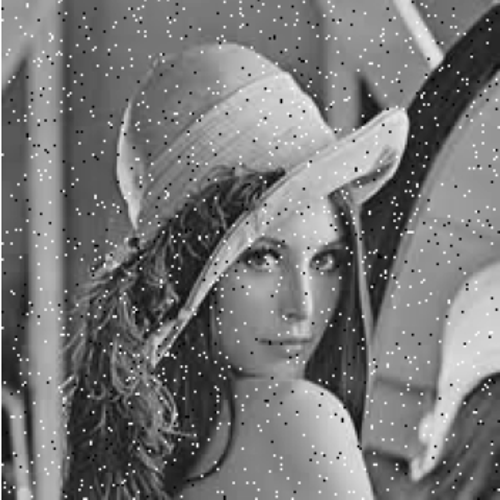

In [24]:
display(Image.open('images_zip/lena_noise.png').resize((500, 500)))


In [25]:
img = cv2.imread('images_zip/lena_noise.png', cv2.IMREAD_GRAYSCALE)

In [26]:
from skimage.color import rgb2gray
from skimage.io import imread
import matplotlib.pyplot as plt
from scipy import ndimage

In [28]:


def noise_remove_morpho_op(image):
    """
    Funcion que remueve el ruido salt y pepeper , pero usando operaciones morfologicas
    como lo es apertura y cierre en las cuales ajustando parametros de size que corresponde
    a la estructura del kerne, la cual se de acuerdo al nivel del ruido.
    
    Operaciones:
    ----------
    - **Apertura**: Erosión seguida de dilatación. Ayuda a eliminar el ruido (salt).
    - **Cierre**: Dilatación seguida de erosión. Ayuda a eliminar el ruido (pepper).
    - **Combinación**: Aplicación secuencial de apertura y luego cierre para manejar el ruido mixto.
    
    Parameters:
    image (numpy.ndarray): la imagen  de entrada, la cual se obliga a que sea en escala de grises y ser
    de dimensiones 2D para que sea un arreglo matricial.
    
    Returns:
    tuple: devuelve la tupla de las imagenes resultantes despues de aplicar las operaciones morfologicas y eliminar los ruidos.
    """
    img_remove_salt_opn = ndimage.grey_opening(image, size=(3, 3))
    im_remove_peper_cls = ndimage.grey_closing(image, size=(3, 3))
    im_remove_both_oc = ndimage.grey_closing(ndimage.grey_opening(image, size=(3, 3)), size=(3, 3))
    return img_remove_salt_opn, im_remove_peper_cls, im_remove_both_oc

def plot_images_subplot(img_gray_original, img_remove_salt_opn, im_remove_peper_cls, im_remove_both_oc):

    plt.figure(figsize=(15, 15))

    plt.subplot(221)
    plt.imshow(img_gray_original, cmap='gray')
    plt.title('Imagen Original', size=20)
    plt.axis('off')

    plt.subplot(222)
    plt.imshow(img_remove_salt_opn, cmap='gray')
    plt.title('Imagen con ruido salt removido', size=20)
    plt.axis('off')

    plt.subplot(223)
    plt.imshow(im_remove_peper_cls, cmap='gray')
    plt.title('Imagen con ruido pepper removido', size=20)
    plt.axis('off')

    plt.subplot(224)
    plt.imshow(im_remove_both_oc, cmap='gray')
    plt.title('Imagen con los dos ruidos (sal, pepper) removido', size=20)
    plt.axis('off')

    plt.show()



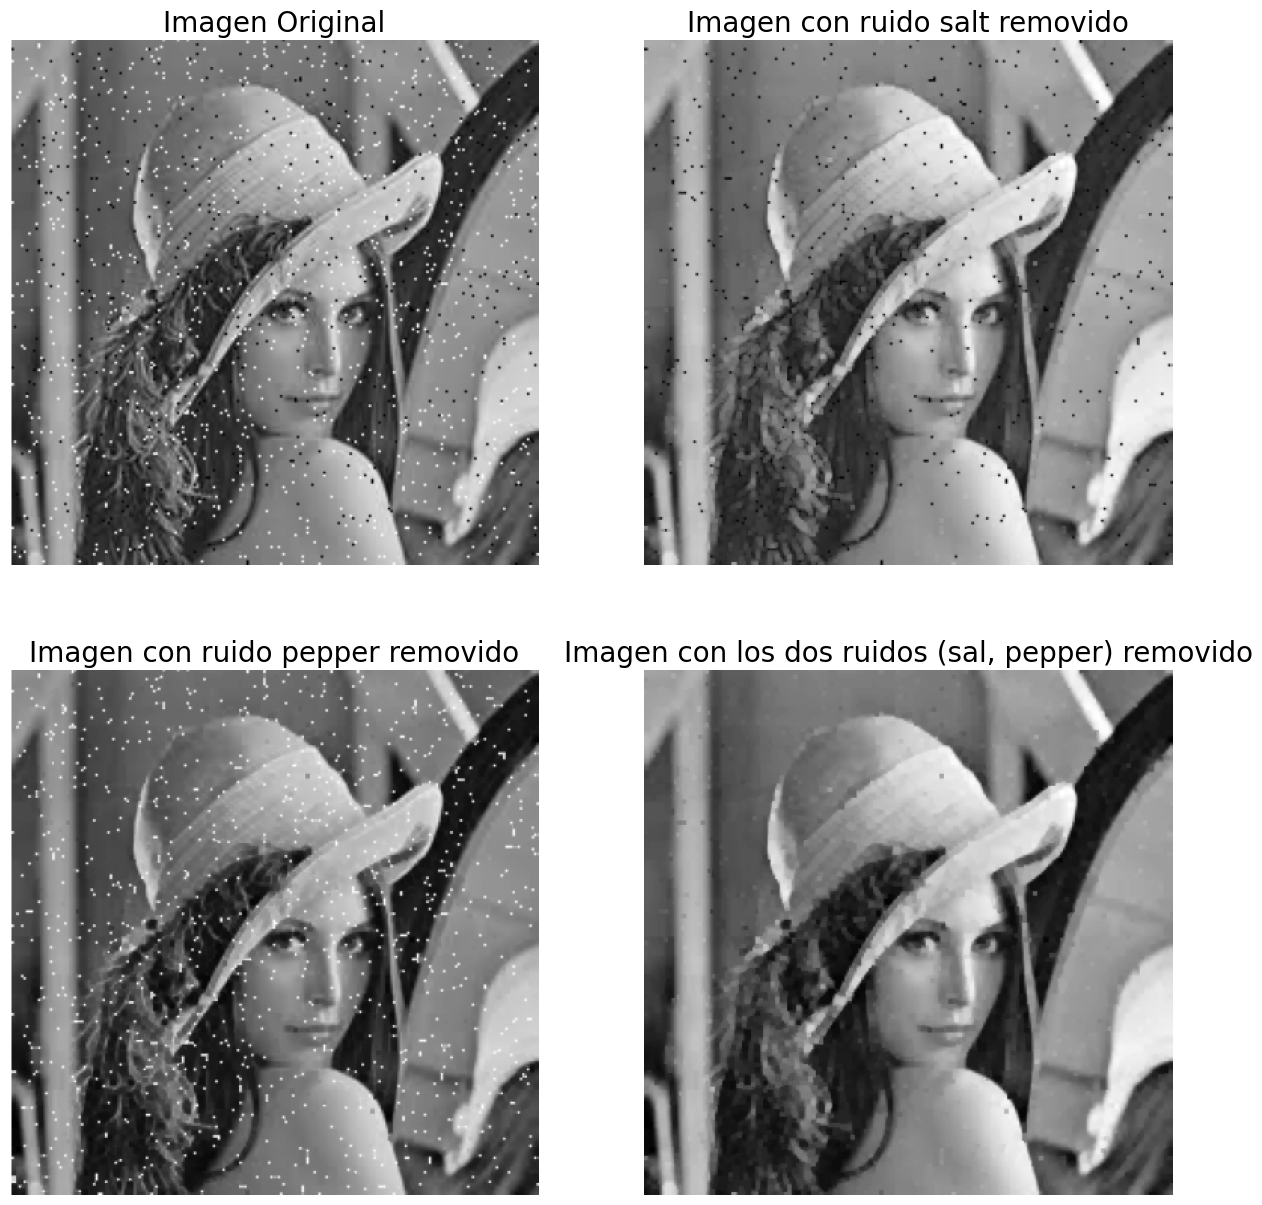

In [29]:

# obligar la imagen a estar en escala de grises
if len(img.shape) == 3 and img.shape[-1] == 4:  # RGBA format
    imag = img[:, :, :3]  # Remove alpha channel
if len(img.shape) == 3:  # RGB format
    img_gray_original = rgb2gray(img)
else:  
    img_gray_original = img

img_remove_salt_opn, im_remove_peper_cls, im_remove_both_oc = noise_remove_morpho_op(img_gray_original)

# Plot the images
plot_images_subplot(img_gray_original, img_remove_salt_opn, im_remove_peper_cls, im_remove_both_oc)

# **Ejercicio 5:**
Cree una clase en Python que acepte una imagen en escala de grises como entrada y proporcione métodos para aplicar varios filtros de procesamiento de imágenes, incluyendo Sobel, Scharr, Laplace, Roberts, Prewitt y un filtro personalizado todo esto sin usar librerías, operación a Pedal.(10%)

Requisitos:

1. **Clase de Procesamiento de Imágenes:**

Cree una clase llamada ImageProcessor que acepte una imagen en escala de grises como entrada durante la inicialización de la clase.
La imagen se puede representar como una matriz NumPy 2D, donde cada elemento de la matriz corresponde a un píxel en la imagen en escala de grises.

2. **Métodos de Filtros:**

Implemente métodos dentro de la clase ImageProcessor para aplicar los siguientes filtros:
- Filtro Sobel.
- Filtro Scharr.
- Filtro Laplace.
- Filtro Roberts.
- Filtro Prewitt.
- Filtro personalizado: Permita que el usuario defina una matriz de convolución personalizada y aplique el filtro a la imagen.


3. **Resultado de los Filtros:**

- Los métodos de filtros deben devolver una nueva imagen en escala de grises que representa el resultado de aplicar el filtro correspondiente.
- La nueva imagen se puede representar como una matriz NumPy 2D.
4. **Documentación y Ejemplos:**

* Proporcione documentación clara y comentarios en el código para explicar cómo usar la clase ImageProcessor y sus métodos.
* Proporcione ejemplos de cómo cargar una imagen en escala de grises, crear una instancia de la clase ImageProcessor y aplicar los diferentes filtros.

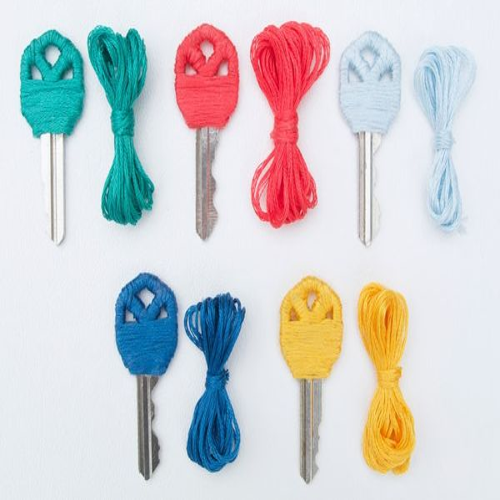

In [7]:
display(Image.open('image_exam/Llaves.jpg').resize((500, 500)))

In [36]:
import numpy as np

class ImageProcessor:
    def __init__(self, grayscale_image):
        """
        Inicializa la clase ImageProcessor con una imagen en escala de grises.

        Args:
        - grayscale_image: Matriz NumPy 2D que representa la imagen en escala de grises.
        """
        self.image = grayscale_image

    def convoled_ea(self, kernel):
        """
        Realiza una convolución 2D manual sobre la imagen con el núcleo dado.

        Args:
        - kernel: Matriz NumPy 2D que representa el núcleo del filtro.

        Returns:
        Una nueva imagen en escala de grises con el resultado de la convolución.
        """
        kernel = np.flipud(np.fliplr(kernel))  
        image_padded = np.pad(self.image, ((1, 1), (1, 1)), mode='edge')  # Agrega bordes
        output = np.zeros_like(self.image)

        for i in range(self.image.shape[0]):
            for j in range(self.image.shape[1]):
                region = image_padded[i:i + kernel.shape[0], j:j + kernel.shape[1]]
                output[i, j] = np.sum(region * kernel)

        return output.clip(0, 255)

    def apply_sobel(self):
        """
        Aplica el filtro Sobel a la imagen.

        Returns:
        Una nueva imagen en escala de grises que representa el resultado de aplicar el filtro Sobel.
        """
        sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
        sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

        gradient_x = self.convoled_ea(sobel_x)
        gradient_y = self.convoled_ea(sobel_y)
        gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

        return gradient_magnitude.clip(0, 255)

    def apply_scharr(self):
        """
        Aplica el filtro Scharr a la imagen.

        Returns:
        Una nueva imagen en escala de grises que representa el resultado de aplicar el filtro Scharr.
        """
        scharr_x = np.array([[-3, 0, 3], [-10, 0, 10], [-3, 0, 3]])
        scharr_y = np.array([[-3, -10, -3], [0, 0, 0], [3, 10, 3]])

        gradient_x = self.convoled_ea(scharr_x)
        gradient_y = self.convoled_ea(scharr_y)
        gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

        return gradient_magnitude.clip(0, 255)

    def apply_laplace(self):
        """
        Aplica el filtro Laplace a la imagen.

        Returns:
        Una nueva imagen en escala de grises que representa el resultado de aplicar el filtro Laplace.
        """
        laplace_filter = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
        laplace_result = self.convoled_ea(laplace_filter)
        return laplace_result

    def apply_roberts(self):
        """
        Aplica el filtro Roberts a la imagen.

        Returns:
        Una nueva imagen en escala de grises que representa el resultado de aplicar el filtro Roberts.
        """
        roberts_x = np.array([[1, 0], [0, -1]])
        roberts_y = np.array([[0, 1], [-1, 0]])

        gradient_x = self.convoled_ea(roberts_x)
        gradient_y = self.convoled_ea(roberts_y)
        gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

        return gradient_magnitude.clip(0, 255)

    def apply_prewitt(self):
        """
        Aplica el filtro Prewitt a la imagen.

        Returns:
        Una nueva imagen en escala de grises que representa el resultado de aplicar el filtro Prewitt.
        """
        prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
        prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

        gradient_x = self.convoled_ea(prewitt_x)
        gradient_y = self.convoled_ea(prewitt_y)
        gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

        return gradient_magnitude.clip(0, 255)

    def apply_custom_filter(self, custom_filter):
        """
        Aplica un filtro personalizado a la imagen.

        Args:
        - custom_filter: Matriz NumPy 2D que representa el filtro personalizado.

        Returns:
        Una nueva imagen en escala de grises que representa el resultado de aplicar el filtro personalizado.
        """
        custom_result = self.convoled_ea(custom_filter)
        return custom_result


In [37]:
from skimage import io, color

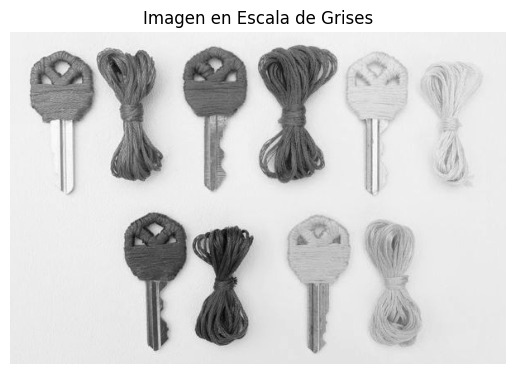

In [38]:
gray_img = color.rgb2gray(io.imread('image_exam/Llaves.jpg'))

plt.imshow(gray_img, cmap='gray')
plt.axis('off')
plt.title('Imagen en Escala de Grises')
plt.show()


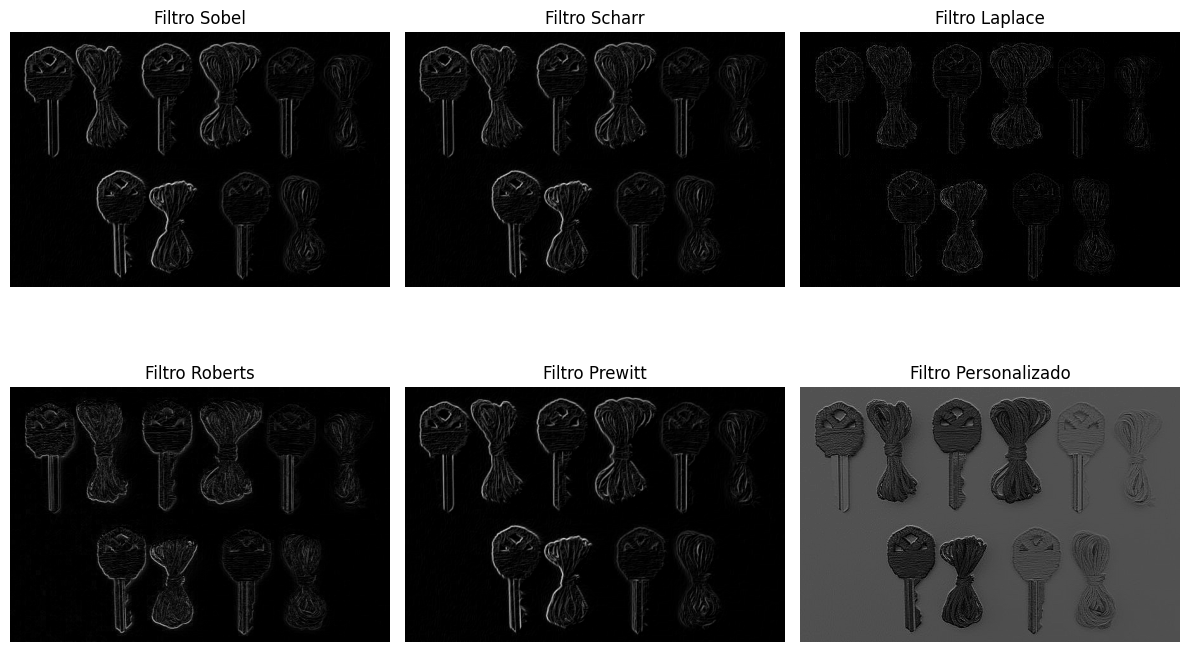

In [39]:

img_processor = ImageProcessor(gray_img)

sobel_result = img_processor.apply_sobel()
scharr_result = img_processor.apply_scharr()
laplace_result = img_processor.apply_laplace()
roberts_result = img_processor.apply_roberts()
prewitt_result = img_processor.apply_prewitt()
custom_filter = np.array([[-1, -10, -1], [-1, 20, -1], [-1, -1, -1]]) 
custom_result = img_processor.apply_custom_filter(custom_filter)

# Visualización
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 3, figsize=(12, 8))

axs[0, 0].imshow(sobel_result, cmap='gray')
axs[0, 0].set_title('Filtro Sobel')
axs[0, 1].imshow(scharr_result, cmap='gray')
axs[0, 1].set_title('Filtro Scharr')
axs[0, 2].imshow(laplace_result, cmap='gray')
axs[0, 2].set_title('Filtro Laplace')
axs[1, 0].imshow(roberts_result, cmap='gray')
axs[1, 0].set_title('Filtro Roberts')
axs[1, 1].imshow(prewitt_result, cmap='gray')
axs[1, 1].set_title('Filtro Prewitt')
axs[1, 2].imshow(custom_result, cmap='gray')
axs[1, 2].set_title('Filtro Personalizado')

for ax in axs.flat:
    ax.axis('off')
plt.tight_layout()